In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
team = 'Tottenham'
years = ['2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']
balances = dict()

for year in years:
    df = pd.read_csv(f'data/{year}.csv', usecols=['Date', 'HomeTeam', 'AwayTeam', 'FTR', 'B365H', 'B365D', 'B365A'])
    df = df[(df.HomeTeam == team) | (df.AwayTeam == team)]
    balance = 100
    wager = 10
    score = [balance]

    for i in range(len(df)):
        if df.iloc[i].FTR == 'D':
            balance -= wager
        else:
            if df.iloc[i].HomeTeam == team and df.iloc[i].FTR == 'H':
                balance += wager * df.iloc[i].B365H
            elif df.iloc[i].AwayTeam == team and df.iloc[i].FTR == 'A':
                balance += wager * df.iloc[i].B365A
            else:
                balance -= wager
        score.append(balance)
    balances[year] = balance

Average Increase: 310.8545%


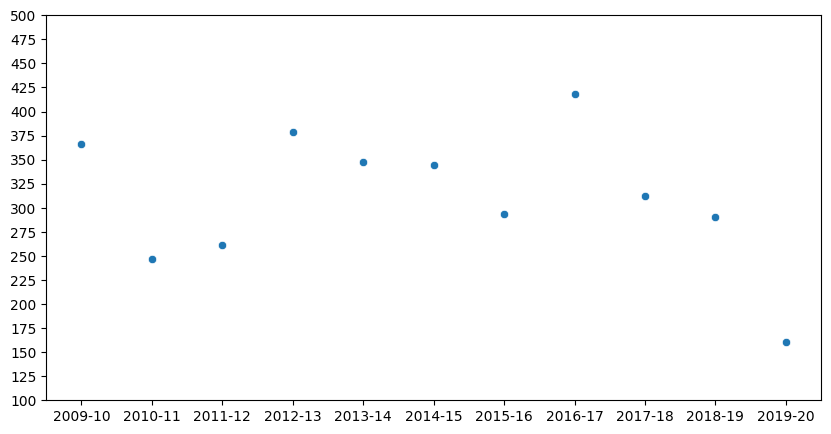

In [87]:
# Calculate average increase as a percentage.
total = 0
for key in balances:
    total += balances[key] / 100
print(f'Average Increase: {round(total / len(years) * 100, 4)}%')

# Plot final balance per year.
plt.figure(figsize=(10, 5))
g = sns.scatterplot(data=balances)
g.set_yticks([100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500])
plt.show()